<center><h3>Régression linéaire multiple<h3></center>

In [2]:
#Importation des bibiotheques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
socialNetwork = pd.read_csv("./../../Datasets/Social_Network_Ads.csv")

socialNetwork.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


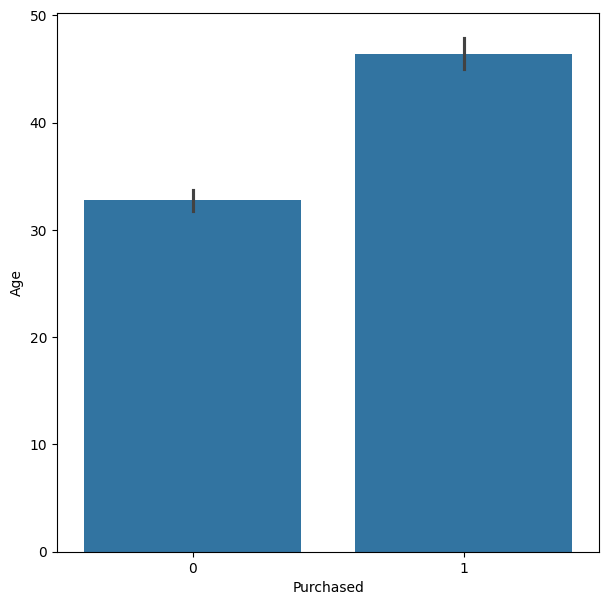

In [4]:

plt.figure(figsize=(7,7))
sns.barplot(x=socialNetwork["Purchased"] , y=socialNetwork["Age"])
plt.show()


In [5]:
socialNetwork.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
X_dataset = socialNetwork.iloc[:, 0:2].values
Y_dataset = socialNetwork.iloc[:, 2].values
Y_dataset

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [7]:

X_train, x_test, Y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.15, random_state=0)

In [8]:
#Y_train = Y_train.reshape(-1, 1)#Quand on a un tableau 1D on doit faire un reshape pour le transformer en 2D car les entrées de la fonction fit doivent etre des tableaux 2D

<center>Normalisation des données</center>

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
x_test = sc_x.fit_transform(x_test)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p=2 pour la distance euclidienne car la distance euclidienne est une distance de Minkowski avec p=2

classifier.fit(X_train, Y_train)


KNeighborsClassifier()

In [11]:
y_predict = classifier.predict(x_test)

print(f'y_test = {y_test}')
print("y_predict = {}".format(y_predict))

y_test = [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0]
y_predict = [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0]


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_predict)
print(f'accuracy = {acc}')
matrix = confusion_matrix(y_test, y_predict)

print("confusion matrix  = {}".format(matrix))

accuracy = 0.9166666666666666
confusion matrix  = [[41  4]
 [ 1 14]]
